In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

#experiment 0
bank = pd.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = {'no': 0.0, 'yes': 1.0}
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,

    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pd.get_dummies(bank, columns=categorical,
                      prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM

scaled = ['age', 'balance', 'day', 'month',
          'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = preprocessing.scale(bank[scaled].astype(float))

# Training set and targets
X = bank.drop(columns='y').values
t = bank['y'].values

In [19]:
#experiment 1
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, shuffle = True)

In [20]:
#experiment 2
from sklearn.naive_bayes import GaussianNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, t_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Gausian CLF Score: 0.8331491712707182
Confusion Matrix 
[[703  95]
 [ 56  51]]
Gaussian CLF auc Score: <function roc_auc_score at 0x7f9fda97eb18>


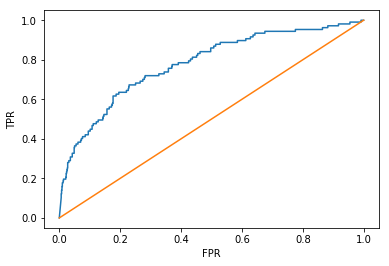

In [21]:
#experiment 3
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
gaussian_score = gaussian_clf.score(X_test, t_test)

gaussian_pred = gaussian_clf.predict(X_test)
cm = confusion_matrix(t_test, gaussian_pred)

gaussian_proba = gaussian_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(t_test, gaussian_proba)
auc = roc_auc_score(t_test, gaussian_proba)

print "Gausian CLF Score: " + str(gaussian_score)
print "Confusion Matrix "
print cm
print "Gaussian CLF auc Score: " + str(roc_auc_score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [22]:
#eperiment 4
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(fit_intercept = False, solver = 'lbfgs')
logistic_clf.fit(X_train, t_train)
logistic_score = logistic_clf.score(X_test, t_test)
print "Logistic CLF Score: " + str(logistic_score)

Logistic CLF Score: 0.8917127071823204


In [31]:
#experiment 5
from sklearn.svm import SVC
results = []
for i, k in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
	svc = SVC(kernel = k).fit(X_train, t_train)
	svc_score = svc.score(X_test, t_test)
	results.append(svc_score)

In [33]:
#eperiment 6
score_max = 0
best_kernel = -1
for k in range(0, 4):
	if results[k] > score_max:																																																	
		score_max = results[k]
		best_kernel = k
if (best_kernel == 0):
	best_kernel = 'linear'
elif (best_kernel == 1):
	best_kernel = 'poly'	
elif (best_kernel == 2):
	best_kernel = 'rbf'
elif (best_kernel == 3):
	best_kernel = 'sigmoid'		
print "The best kernel was " + str(best_kernel) + ", with a score of " + str(score_max)

The best kernel was linear with a score of 0.8917127071823204
